In [596]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [597]:
import numpy as np

from consumption_saving import *

In [598]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [599]:
value_function_employment(model.par)

In [600]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 100)


array([-3.14946637, -2.98306379, -2.81564967, -2.64824669, -2.48226163,
       -2.31961134, -2.16289029, -2.01559373, -1.88241581, -1.76964889,
       -1.6857205 , -1.54031726, -1.39375778, -1.24678898, -1.1004733 ,
       -0.95630988, -0.81640552, -0.68371824, -0.56240853, -0.4583534 ,
       -0.37991198, -0.28676628, -0.19338563, -0.10020473, -0.00783544,
        0.0828609 ,  0.17066798,  0.25385777,  0.32995233,  0.3953524 ,
        0.44473763,  0.44473763,  0.44473763,  0.44473763,  0.44473763,
        0.44473763,  0.44473763,  0.44473763,  0.44473763,  0.44473763,
        0.44473763])

In [601]:
print(np.shape(model.par.V_e))
model.par.V_e[34,:,5]

(41, 20, 100)


array([ 0.71369778,  0.09805074, -0.44470552, -0.92584434, -1.35270971,
       -1.7298034 , -2.05937821, -2.34173738, -2.57533915, -2.75675541,
       -2.88050621, -2.88050621, -2.88050621, -2.88050621, -2.88050621,
       -2.88050621, -2.88050621, -2.88050621, -2.88050621,  0.        ])

In [602]:
solve_search_and_consumption(model.par, model.sol)

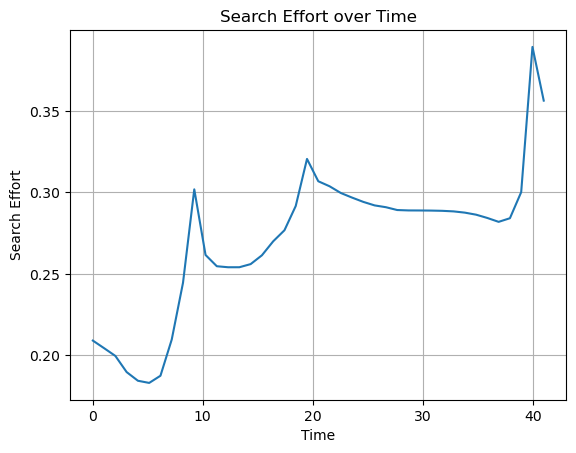

In [603]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,-1])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


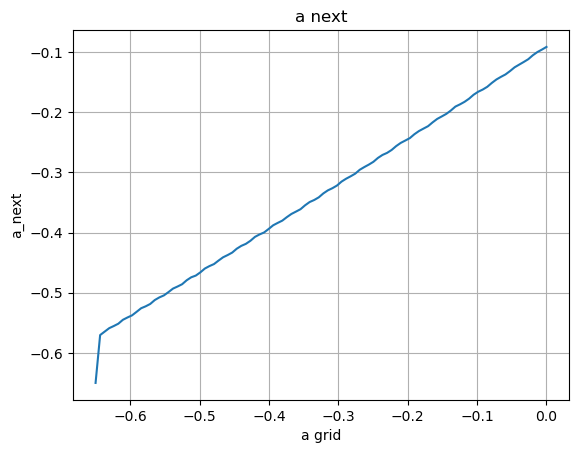

In [604]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [605]:
# model1 = model.copy()
# model1.par.euler = False

In [606]:
#value_function_employment(model1.par)

In [607]:
# solve_search_and_consumption(model1.par, model1.sol)

In [608]:
# plt.plot(time, model.sol.s[:model.par.T-model.par.M,0], label='Euler')
# plt.plot(time, model1.sol.s[:model.par.T-model.par.M,0], label='No Euler')


# plt.xlabel('Time')
# plt.ylabel('Search Effort')
# plt.title('Search Effort over Time')
# plt.grid(True)
# plt.legend()
# plt.show()


In [609]:

# plt.plot(time, model.sol.s[:model.par.T-model.par.M,0]-model1.sol.s[:model.par.T-model.par.M,0])

# plt.xlabel('Time')
# plt.ylabel('Search Effort')
# plt.title('Search Effort over Time')
# plt.grid(True)
# plt.show()


In [610]:
solve_forward(model.par, model.sol, model.sim)

In [611]:
# solve_forward(model1.par, model1.sol, model1.sim)

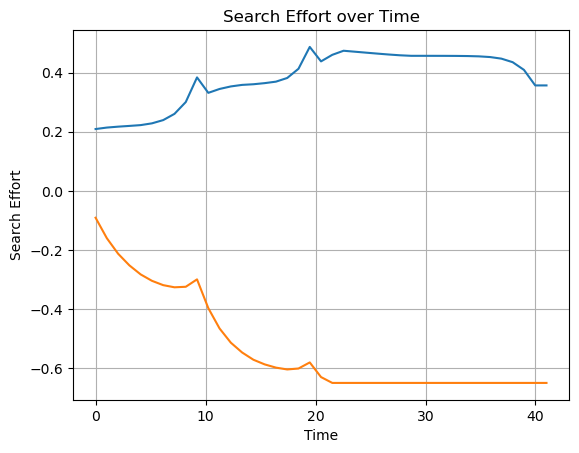

In [612]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T])
plt.plot(time, model.sim.a_next[:model.par.T])

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()
